# if

In [ ]:
# pandas & numpy:
import numpy as np
import pandas as pd

# visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# tokenization:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import string

In [ ]:
emails=pd.read_csv("/content/drive/MyDrive/enron email/emails_cleaned.csv")
emails.info()

<ipython-input-4-30398241761d>:1: DtypeWarning: Columns (10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  emails=pd.read_csv("/content/drive/MyDrive/enron email/emails_cleaned.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517398 entries, 0 to 517397
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 517398 non-null  int64 
 1   info                       517398 non-null  object
 2   content                    517398 non-null  object
 3   num_info                   517398 non-null  int64 
 4   Message-ID                 517398 non-null  object
 5   Date                       517398 non-null  object
 6   From                       517398 non-null  object
 7   To                         495553 non-null  object
 8   Subject                    498118 non-null  object
 9   Cc                         127883 non-null  object
 10  Mime-Version               517398 non-null  object
 11  Content-Type               517398 non-null  object
 12  Content-Transfer-Encoding  517398 non-null  object
 13  Bcc                        127883 non-null  

In [ ]:
contents=emails[['content']]

In [ ]:
contents.head()

,content
0,"Notice to Members No. 01-194\nJune 7, 2001\n\n..."
1,"Notice No. 01-201\nJune 14, 2001\n\nNote: To v..."
2,"Notice No.: 01-203\nJune 25, 2001\n\nTo:\nAll..."
3,"Notice # 01-186\nJune 1, 2001\n\nTO:\nAll NYME..."
4,"Tana,\n\nEveryone who has access to Lotus Note..."


In [ ]:
duplicates=contents.duplicated()
duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
517393,False
517394,False
517395,False
517396,True


In [ ]:
contents['content'].value_counts()

,count
content,
"As you know, Enron Net Works (ENW) and Enron Global Strategic Sourcing (GSS) recently executed a two-year agreement, whereby MCI WorldCom would serve as Enron's primary telecommunications provider. In our previous communication, we indicated that we would provide you with more detailed information as it became available.\n\nBeginning Friday, October 26, 2001 at 9 a.m. C.S.T, the procedure for calling Enron's Houston offices from international locations, excluding Canada, using the 800-97-Enron phone number will change. The new procedure is as follows: \n\n1.\tPlease dial the WorldPhone International Access number for the country where you are located (country access code), which is available on the attached wallet card, accessible through the following link: http://home.enron.com:84/messaging/mciannouncement.doc. \n2.\tYou will then be prompted for your PIN number. Since calling cards and pin numbers are not required to use this service, all users should respond by dialing 1-800-97-ENRON or 1-800-973-6766. \n3.\tYou will then be asked to enter your destination. Please dial 0-800-97-Enron (800-973-6766) to reach Enron's corporate offices in Houston.\n \nThis procedure can only be used to call 800-97-Enron from WorldPhone International locations. If you are calling from the U. S. or Canada, please continue to dial 1-800-97-ENRON.\n \nIf you have questions regarding commercial aspects of this agreement, please feel free to contact Tom Moore, GSS senior contract manager at 713-345-5552. For technical issues, please contact Hasan Imam, ENW IT manager at 713-345-8525. \n",112
"We've updated the Merger Q&A document on our Enron Updates site ( <http://home.enron.com/updates/mergerQA.html>), as a result of the many questions you've had concerning the merger between Enron and Dynegy. Questions addressed include those about Enron stock options, benefits and immigration status. Please stay tuned for additional updates.",110
"Ken Lay and Jeff Skilling were interviewed on CNNfn to discuss the succession \nof Jeff to CEO of Enron. We have put the interview on IPTV for your viewing \npleasure. Simply point your web browser to http://iptv.enron.com, click the \nlink for special events, and then choose ""Enron's Succession Plan."" The \ninterview will be available every 15 minutes through Friday, Dec. 15.",107
"\nAs you know, this is an unprecedented time in Enron's history. We must adapt our employee programs to fit the immediate needs of our company during this time of transition. It is especially difficult to announce the immediate suspension of the following programs.\n\n?\tClickAtHome - Enron has suspended the ClickAtHome program. The program will no longer accept new participants, PC orders, or Internet service orders. Orders submitted and confirmed prior to November 20, 2001 will be honored. Enron will also discontinue subsidized Internet service. Effective January 1, 2002, employees who are currently subscribers to subsidized Internet service will be switched to the regular commercial rate of their service provider and be responsible for the entire cost of the service.\n?\tMatching Gifts and Volunteer Incentive Program (VIP) - Enron's Matching Gift program and VIP grants have been suspended indefinitely. As we consider the immediate needs of all employees during this trying time, it is appropriate that we discontinue the dollar for dollar match for charitable contributions as well as cash donations recognizing employees' volunteer hours with non-profit organizations. Matching Gift or VIP submissions received prior to November 20 will be honored.\n\nWe regret that we have had to make these changes. We must continue to look for ways to reduce operating expenses through this transition period.\n",106
"\nOur natural gas business continues to benefit from effective account management and resource allocation focused on identifying and responding to the needs of our varied customers. In order to keep our organization optimally

In [ ]:
contents.drop_duplicates(subset=None, keep='first', inplace=True)
contents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249010 entries, 0 to 517395
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  249010 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


<ipython-input-9-6754516b9d5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contents.drop_duplicates(subset=None, keep='first', inplace=True)


In [ ]:
emails['text']=emails['content']+' '+emails['Subject']

In [ ]:
emails['text'].duplicated().sum()

275780

In [ ]:
emails['content'].duplicated().sum()

268388

In [ ]:
text=emails['text'].drop_duplicates()

In [ ]:
text.info()

<class 'pandas.core.series.Series'>
Index: 241618 entries, 0 to 517395
Series name: text
Non-Null Count   Dtype 
--------------   ----- 
241617 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

def clean(text):

  lemma = WordNetLemmatizer()
  # Getting stopwords for English:
  stop_words = set(stopwords.words('english'))
  # Adding additional stop words from nltk. Since we are working with emails we will include words like: from, to,...
  stop_words.update(('from','to','cc','http', 're', 'www', 'com','subject','sent','email','u','ok','thanks','please','ect','ect', 'hou', 'com', 'recipient', 'sent', 'enron', 'cc', 'subject',\
                                         'forwarded', 'corp', 'said', 'attached', 'ect',\
                                         'recipient', 'email', 'original', 'doc', 'pm', 'mail', 'message', 'new'\
                                         'enronxgate', 'na', 'year'))

  exclude = set(string.punctuation)
  exclude.update(('\n'))

  text=text.rstrip()
  text = re.sub(r'[^a-zA-Z]', ' ', text)
  stop_free = " ".join([i for i in text.lower().split() if((i not in stop_words) and (not i.isdigit()) and len(i)>3)])
  punch_free= " ".join(ch for ch in stop_free.split() if(ch not in exclude))
  lemmatized= " ".join(lemma.lemmatize(word) for word in punch_free.split())

  return lemmatized


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lemma = WordNetLemmatizer()
lemmatized= " ".join(lemma.lemmatize(word , pos='v') for word in "following running ran sleeping".split())

In [ ]:
lemmatized

'follow run run sleep'

In [ ]:
(clean('Notice to Members No. 01-194\nJune 7, 2001\n\nCORRECTS AND SUPPLEMENTS PREVIOUS NOTICE TO MEMBERS NO. 01-191\n\nAll amended rules can be found on the New York Mercantile Exchange, Inc. website @ http://www.nymex.com/refernce/notices/2001/ntm_191r.htm.\n\nTo:\nAll NYMEX Division Members\nAll NYMEX Division Clearing Members\nAll NYMEX Division Member Firms\n\nFrom:\nNeal Wolkoff, Executive Vice President\n\nRe:\n--\tAmendments to NYMEX Division Position Limit and Reporting Rules\n--\tAmendments to Large Trader Reporting Requirements for Light Sweet\n        Crude Oil and the Addition of Brent Crude Oil\n\nThe Board of Directors of the New York Mercantile Exchange, Inc. has approved various amendments to NYMEX Division Chapter 9 rules which, in general, move away from hard position limits "in any one month and all months combined" to position accountability standards. These amendments shall be effective as of the open of trading on Friday, June 15, 2001.\n\nThe amendments to any one month, all months combined and option quadrants limits as cited in Rule 9.26, position accountability will provide for the ability for any participant to exceed the prescribed levels. (As a note: the levels advocated for any one month and all months combined are the levels currently in place for all months combined under the existing rule structure. The currently defined any one month limits, which are lower than the all months limits, are being deleted. Additionally, the gross side of market rules are deleted.) Any market participant exceeding the defined position accountability levels will be subject to being contacted by the Exchange when the Exchange deems it necessary, and will be required to supply relevant information as to its position and the status of its account. If the participant refuses to do so, or if the Exchange believes the position, by its size, is a threat to the orderly operation of the market, a market participant can be direct!\ned!\n either to not increase or to decrease its position.\n\nThe existing current delivery month on expiration limits as defined in existing Rule 9.27 will be unchanged and subject to hedge/swap exemptions as they are today. The only caveat to this is that certain cash-settled enymexsm contracts will operate with some level of position accountability in the current delivery month.\n\nFurther, the large trader reporting levels cited in Rule 9.34 for Light Sweet Crude Oil futures has been amended from 300 to 350 contracts to coincide with existing CFTC standards. The soon to be traded Brent Crude Oil futures\' reporting level has been added at the same level of 350 contracts.\n\nLastly, the any one month/all months position accountability level for the Brent Crude Oil contract of 20,000 has been added.\n\nAll '))

'notice member june corrects supplement previous notice member amended rule found york mercantile exchange website nymex refernce notice nymex division member nymex division clearing member nymex division member firm neal wolkoff executive vice president amendment nymex division position limit reporting rule amendment large trader reporting requirement light sweet crude addition brent crude board director york mercantile exchange approved various amendment nymex division chapter rule general move away hard position limit month month combined position accountability standard amendment shall effective open trading friday june amendment month month combined option quadrant limit cited rule position accountability provide ability participant exceed prescribed level note level advocated month month combined level currently place month combined existing rule structure currently defined month limit lower month limit deleted additionally gross side market rule deleted market participant exceed

In [ ]:
# text=text.apply(clean)

In [ ]:
text.isnull().sum()

1

In [ ]:
text[text.isnull()]

,text
82,NaN


In [ ]:
text=text.dropna()

In [ ]:
text=text.apply(clean)

In [ ]:
text

,text
0,notice member june corrects supplement previou...
1,notice june note view properly formatted copy ...
2,notice june comex division member comex divisi...
3,notice june nymex division comex division clea...
4,tana everyone access lotus note view legal com...
...,...
517384,dear love thank signing neteller fastest secur...
517390,pedseye esotropiaa
517393,paypal send ball bennett warren walker school ...
517394,wong olga wednesday october love dianne articl...


# else

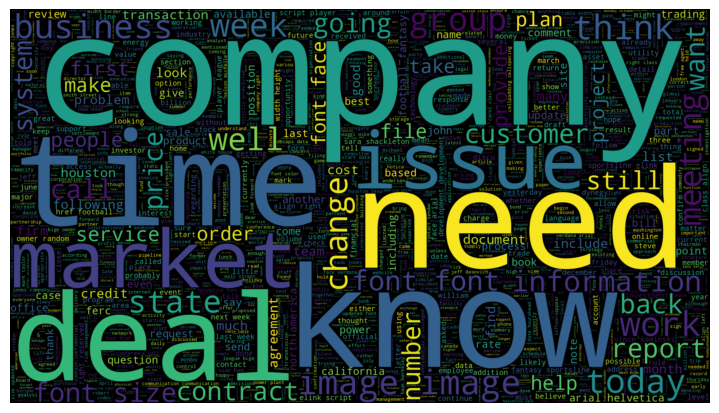

In [ ]:
# plot the word cloud for the sample text
sample_text = " ".join(text.sample(10000))
wc = WordCloud(max_words=2000, width=1920, height=1080).generate(sample_text)
plt.figure(figsize = (7,7))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**tfidf word embedding method**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
n_features=1000
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(text)
print(tfidf)

  (0, 580)	0.11725354237025098
  (0, 539)	0.14331903744866598
  (0, 451)	0.05857967427807561
  (0, 662)	0.035585743083082856
  (0, 767)	0.3345534664271718
  (0, 999)	0.09180747395872436
  (0, 290)	0.19239081614530393
  (0, 970)	0.06536078033649137
  (0, 584)	0.32024775839824077
  (0, 248)	0.23429232114159212
  (0, 145)	0.042922967496272994
  (0, 319)	0.030006058371061475
  (0, 292)	0.03244139160586088
  (0, 958)	0.03515811651625194
  (0, 659)	0.03069533559487237
  (0, 34)	0.23101706966612098
  (0, 649)	0.30998774219389985
  (0, 484)	0.254141761703908
  (0, 731)	0.1902805851774102
  (0, 463)	0.06809894115016836
  (0, 922)	0.06537800585777574
  (0, 737)	0.03304709037176785
  (0, 481)	0.06999284380146283
  (0, 203)	0.19786077698498125
  (0, 12)	0.03087264602443077
  :	:
  (241614, 630)	0.14513613773476544
  (241614, 288)	0.13325400261459258
  (241615, 144)	0.2827893840207299
  (241615, 229)	0.258021669083373
  (241615, 105)	0.19771122555591694
  (241615, 690)	0.25377556180144634
  (241615

In [ ]:
(tfidf.shape)

(241617, 1000)

**countvectorizer word embedding method**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count= CountVectorizer(stop_words='english', max_df=0.1, max_features=n_features)
cv=count.fit_transform(text)

**Frequently Occuring Words**

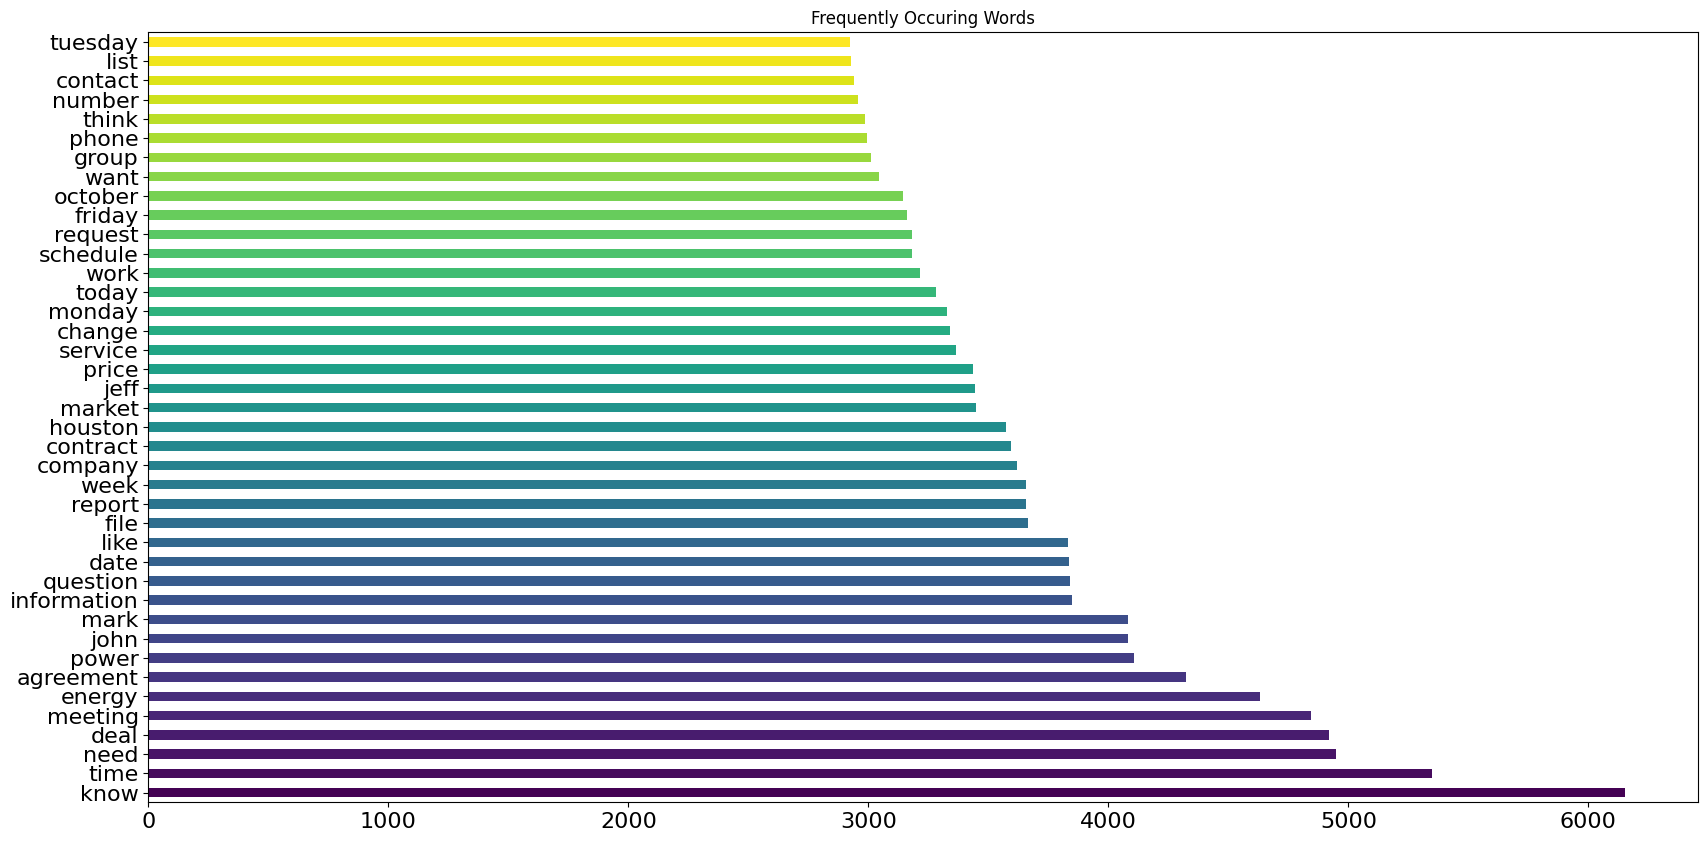

In [ ]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Sum the values and sort
word_counts = tfidf_df.sum().sort_values(ascending=False).head(40)
colors = plt.cm.viridis(np.linspace(0, 1, len(word_counts)))
word_counts.plot(kind='barh',
                 figsize=(20,10),
                 fontsize=16,
                 title='Frequently Occuring Words',
                 color=colors);

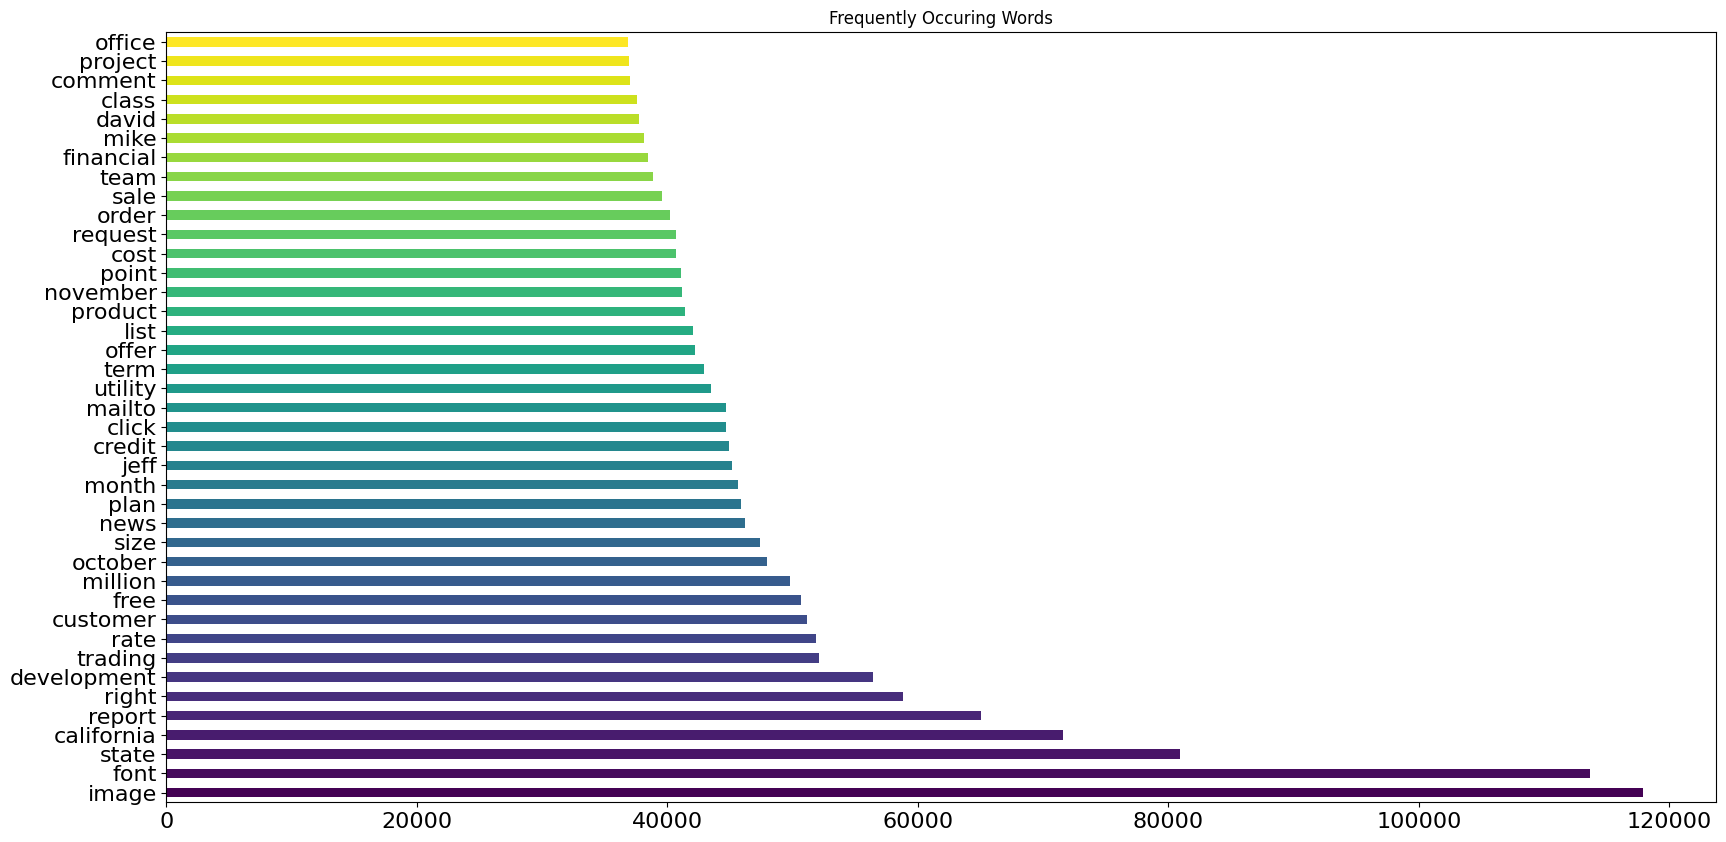

In [ ]:
cv_df=pd.DataFrame(cv.toarray(), columns=count.get_feature_names_out())

#sum the values and sort
word_counts=cv_df.sum().sort_values(ascending=False).head(40)


colors = plt.cm.viridis(np.linspace(0, 1, len(word_counts)))
word_counts.plot(kind='barh',
                                                                  figsize=(20,10),
                                                                  fontsize=16,
                                                                  title='Frequently Occuring Words', color=colors);

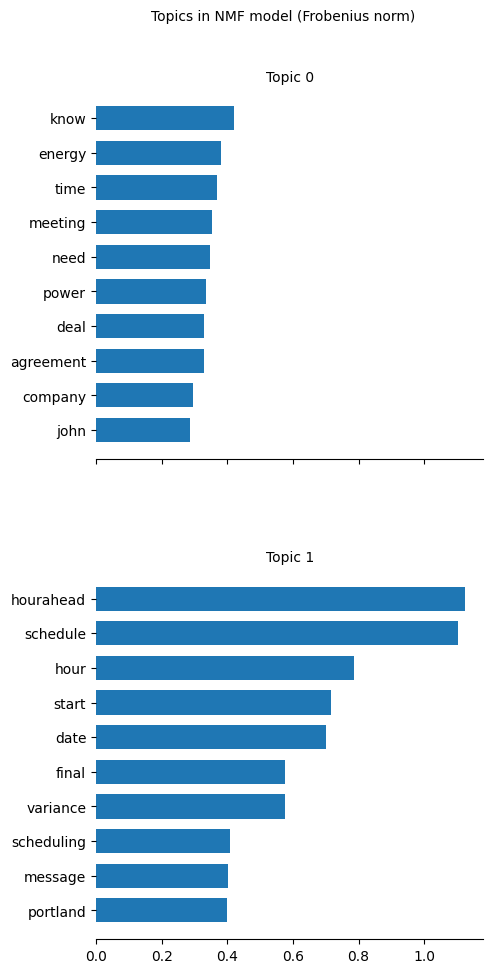

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF, LatentDirichletAllocation



n_features = 1000
n_components = 2
n_top_words = 10

init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
    axes = axes.flatten()

    #Iterates over the topics (model.components_),
    # which is a matrix where each row represents a topic, and the values represent the importance of each feature (word)
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 10})
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=10)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()




nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005, #Regularization parameters
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)



tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)



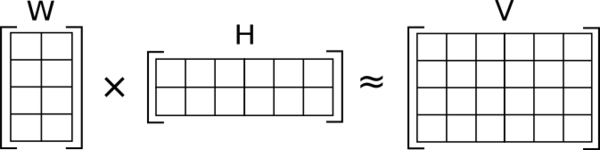

In [ ]:
nmf.components_.shape#topic-word matrix

(2, 1000)

In [ ]:
#In NMF, the document-topic matrix is stored in model.transform()(w matrix)
doc_topic_matrix = nmf.transform(tfidf)

# Get the predominant topic for each document (the topic with the highest weight)
predominant_topics = np.argmax(doc_topic_matrix, axis=1)

In [ ]:
doc_topic_matrix.shape

(241617, 2)

In [ ]:
first_topic_count = np.sum(predominant_topics)
second_topic_count=len(predominant_topics)- first_topic_count

In [ ]:
print(f"Topic 0 has {second_topic_count} documents.")
print(f"Topic 1 has {first_topic_count} documents.")

Topic 0 has 233434 documents.
Topic 1 has 8183 documents.


so maybe documents in topic 1 might be fraudulent.

**Let's se 5 top rated document for each topic:**

In [ ]:
# Number of top documents to display for each topic
n_top_documents = 3

# Get the indices of the top 5 documents for each topic
for topic_idx in range(n_components):
    # Get the topic scores for all documents
    topic_scores = doc_topic_matrix[:, topic_idx]

    # Get the indices of the top 5 documents (highest topic score)
    top_doc_indices = np.argsort(topic_scores)[::-1][:n_top_documents]

    # Print the top 5 documents for the current topic
    print(f"\nTop {n_top_documents} documents for Topic {topic_idx }:\n")
    for doc_idx in top_doc_indices:
        # Print the actual document
        print(f"Document text: {emails.iloc[doc_idx]['text']}\n")
        print('******')
    print('------------------------------------------------------------------------')


Top 3 documents for Topic 0:

Document text: Dear Judge Biren:

 Transwestern Pipeline Company will be offering the following exhibits:

 1.  Prepared Direct Testimony of Jeffery C. Fawcett on Behalf of 
Transwestern Pipeline Company in Support of the Comprehensive Settlement 
Agreement (Exhibit 12, incorporating Exhibit JCF-1) and 

 2.  Prepared Rebuttal Testimony of Jeffery C. Fawcett on Behalf of 
Transwestern Pipeline Company in Support of the Comprehensive Settlement 
Agreement (Exhibit 17).  

 Transwestern estimates it will need less than 10 minutes for direct 
testimony.  Transwestern does not at this time intend to cross-examine any 
witnesses; however, it reserves the right to request a reasonable amount of 
time to examine witnesses on issues affecting Transwestern to the extent that 
any party's live testimony differs from or conflicts with its prepared 
testimony.

Susan Scott
Transwestern Pipeline Company
(713) 853-0596
susan.scott@enron.com


 

 I.99-07-00

******
Doc

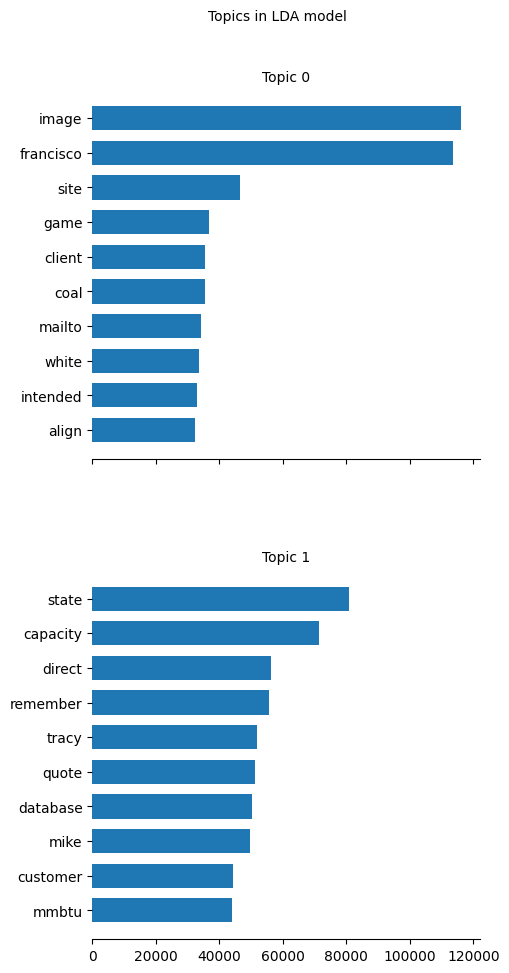

In [ ]:
tf_feature_names = count.get_feature_names_out() #output:document-topic matrix


lda= LatentDirichletAllocation(n_components=2, random_state=123, learning_method='batch')
X_topics=lda.fit_transform(cv)

plot_top_words(
    lda,
    tfidf_feature_names,
    n_top_words,
    "Topics in LDA model ",
)

In [ ]:
predominant_topics = np.argmax(X_topics, axis=1)
first_topic_count = np.sum(predominant_topics)
second_topic_count=len(predominant_topics)- first_topic_count
print(f"Topic 0 has {second_topic_count} documents.")
print(f"Topic 1 has {first_topic_count} documents.")

Topic 0 has 51076 documents.
Topic 1 has 190541 documents.


In [ ]:
# Number of top documents to display for each topic
n_top_documents = 3

# Get the indices of the top 5 documents for each topic
for topic_idx in range(n_components):
    # Get the topic scores for all documents
    topic_scores = X_topics[:, topic_idx]

    # Get the indices of the top 5 documents (highest topic score)
    top_doc_indices = np.argsort(topic_scores)[::-1][:n_top_documents]

    # Print the top 5 documents for the current topic
    print(f"\nTop {n_top_documents} documents for Topic {topic_idx }:\n")
    for doc_idx in top_doc_indices:
        # Print the actual document
        print(f"Document text: {emails.iloc[doc_idx]['text']}\n")
        print('******')
    print('------------------------------------------------------------------------')


Top 3 documents for Topic 0:

Document text: Take a look at this for me.  Thanks.

DG
---------------------- Forwarded by Darron C Giron/HOU/ECT on 04/30/2001 
08:38 AM ---------------------------
From: Trey Hardy/ENRON@enronXgate on 04/27/2001 10:42 AM
To: Darron C Giron/HOU/ECT@ECT
cc:  
Subject: HS Energy

Darron:

I am trying to track an origination for Fred Lagrasta.  Sherry Dawson said 
you would probably be the one to grant this origination.  The deal is HS 
Energy and the Deal number is V58190.  Fred would like to have this granted 
in April, so if I need to give you any additional information please let me 
know.


Thanks

Trey Hardy
 HS Energ

******
Document text: to the smartest two people i know--good luck
i've got the answers if you want them.
karen
-----Original Message-----
From: Watsky, Elizabeth <Elizabeth.Watsky@bakeratlas.com>
To: 'yvette_sepulveda@foleys.com' <yvette_sepulveda@foleys.com>;
'emn@eepb.com' <emn@eepb.com>; 'kwpope@pdq.net' <kwpope@pdq.net>
Date: Tues


What is TruncatedSVD?
Truncated Singular Value Decomposition (TruncatedSVD) is a dimensionality reduction technique that is often used when working with sparse matrices, like document-term matrices

In [ ]:
from sklearn.decomposition import TruncatedSVD


# Apply TruncatedSVD
model = TruncatedSVD(n_components=2, random_state=42)
SVD = model.fit_transform(tfidf)

print(SVD)


[[ 0.16999798 -0.01926599]
 [ 0.11790213 -0.01190823]
 [ 0.13862578 -0.01610818]
 ...
 [ 0.27258312 -0.04393311]
 [ 0.14318707 -0.03635027]
 [ 0.09811087 -0.00726095]]


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

## kmeans

KMeans Clustering:
Cluster 0: 238249 documents
Cluster 1: 3368 documents


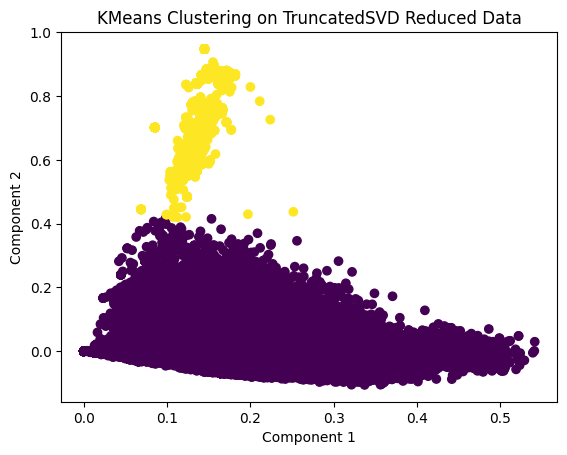

In [ ]:
# KMeans Clustering
kmeans_svd = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_svd.fit_predict(SVD)

# KMeans: Get cluster labels and their counts
# cluster_ids: An array of unique cluster IDs.
# cluster_sizes: An array of the counts of each unique cluster ID, i.e., the number of data points in each cluster.
cluster_ids, cluster_sizes = np.unique(kmeans_svd.labels_, return_counts=True)
print("KMeans Clustering:")
for cluster_id, cluster_size in zip(cluster_ids, cluster_sizes):
    print(f"Cluster {cluster_id}: {cluster_size} documents")


# Scatter plot for KMeans
plt.scatter(SVD[:, 0], SVD[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering on TruncatedSVD Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:
for cluster_id in cluster_ids:
    # Get the indices of the documents belonging to the current cluster
    cluster_indices = np.where(kmeans_labels == cluster_id)[0]

    # Get the distances from the cluster centroid (use the 'transform' method)
    distances = kmeans_svd.transform(SVD[cluster_indices])[:, cluster_id]

    # Get the indices of the top 3 closest documents to the centroid
    top_indices = cluster_indices[np.argsort(distances)[:n_top_documents]]

    print(f"\nTop {n_top_documents} emails for Cluster {cluster_id}:")
    for idx in top_indices:
        # Print the email text (or any other information, like subject)
        print(f"Document text: {emails.iloc[idx]['text']}")
        print("*" * 50)


Top 3 emails for Cluster 0:
Document text: How quaint.



	Paul Kaufman@ECT
	03/20/2001 12:17 PM
		
		 To: Jeff Dasovich/Na/Enron@ENRON
		 cc: 
		 Subject: Re: B. Johnston Lobbies for Davis in D.C.

That explains why he spoke at the WGA meeting in Portland and supported price 
caps.  He's also apparently working for Bryson at Edison.  
 Re: B. Johnston Lobbies for Davis in D.C
**************************************************
Document text: I still need to see you about that Market Disruption summary for the Husky 
Oil Global Contract Datasheet so I can close up that file. Husky Oi
**************************************************
Document text: You may just need warm bodies at this point, big boy Re: Job Openin
**************************************************

Top 3 emails for Cluster 1:
Document text: Alert!
You are receiving this message because you have an unresolved invoice in your iPayit in-box that is past due.  It is critical that you login to iPayit and take immediate act

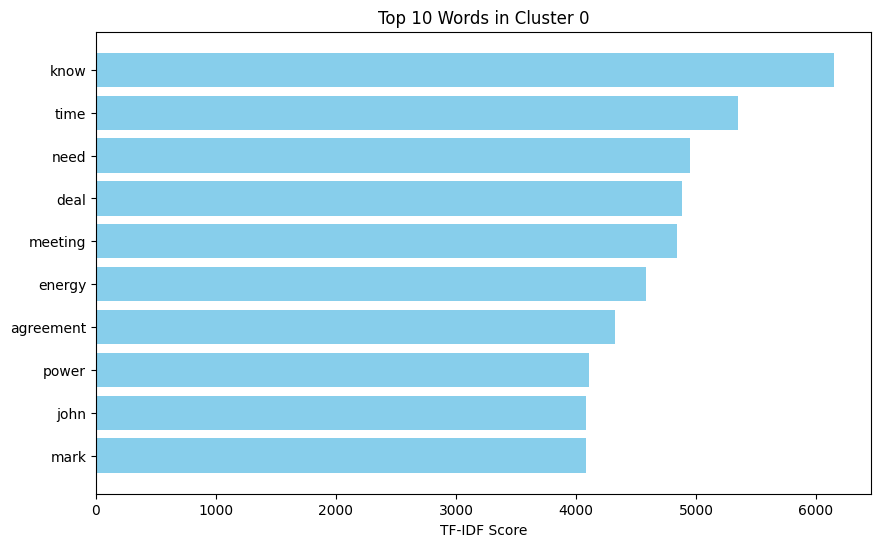

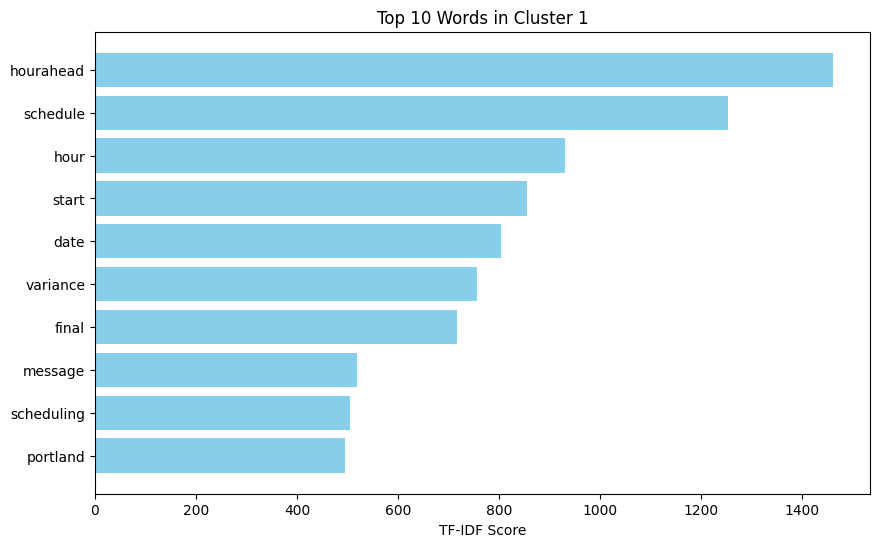

In [ ]:

# Get the feature names (words)
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

n_top_words = 10


for cluster_id in cluster_ids:
  cluster_indices = np.where(kmeans_labels == cluster_id)[0]

  # Get the TF-IDF matrix for the current cluster's documents
  cluster_tfidf = tfidf[cluster_indices]

  # Sum the TF-IDF scores for each word across the cluster's documents
  word_scores = np.asarray(cluster_tfidf.sum(axis=0)).flatten()

  # Get the top n words with the highest TF-IDF scores
  top_indices = word_scores.argsort()[-n_top_words:][::-1]  # Get indices of top words in descending order
  top_words = feature_names[top_indices]
  top_scores = word_scores[top_indices]

  # Plot the top 10 words in a bar chart
  plt.figure(figsize=(10, 6))
  plt.barh(top_words, top_scores, color='skyblue')
  plt.xlabel('TF-IDF Score')
  plt.title(f'Top {n_top_words} Words in Cluster {cluster_id}')
  plt.gca().invert_yaxis()  # Invert y-axis to have the top word on top
  plt.show()




In [ ]:
import numpy as np


# Agglomerative Clustering
agglo_svd = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo_svd.fit_predict(SVD)

# Agglomerative Clustering: Get cluster labels and their counts
agglo_cluster_ids, agglo_cluster_sizes = np.unique(agglo_svd.labels_, return_counts=True)
print("\nAgglomerative Clustering:")
for cluster_id, cluster_size in zip(agglo_cluster_ids, agglo_cluster_sizes):
    print(f"Cluster {cluster_id}: {cluster_size} documents")

# Scatter plot for Agglomerative Clustering
plt.scatter(SVD[:, 0], SVD[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering on TruncatedSVD Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [ ]:

# DBSCAN Clustering
dbscan_svd = DBSCAN()
dbscan_labels = dbscan_svd.fit_predict(SVD)

# DBSCAN: Get cluster labels and their counts
dbscan_cluster_ids, dbscan_cluster_sizes = np.unique(dbscan_svd.labels_, return_counts=True)
print("\nDBSCAN Clustering:")
for cluster_id, cluster_size in zip(dbscan_cluster_ids, dbscan_cluster_sizes):
    if cluster_id == -1:
        print(f"Noise (cluster {-1}): {cluster_size} documents")
    else:
        print(f"Cluster {cluster_id}: {cluster_size} documents")

# Scatter plot for DBSCAN
plt.scatter(SVD[:, 0], SVD[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering on TruncatedSVD Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


KMeans Clustering:
Cluster 0: 238253 documents
Cluster 1: 3364 documents


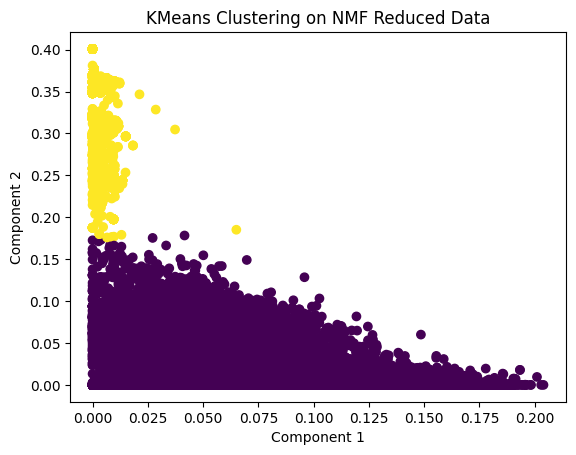

In [ ]:
# Transform the data using NMF
NMF_reduced = nmf.fit_transform(tfidf)

# KMeans Clustering
kmeans_nmf = KMeans(n_clusters=2, random_state=42)
kmeans_nmf_labels = kmeans_nmf.fit_predict(NMF_reduced)

cluster_ids, cluster_sizes = np.unique(kmeans_nmf.labels_, return_counts=True)
print("KMeans Clustering:")
for cluster_id, cluster_size in zip(cluster_ids, cluster_sizes):
    print(f"Cluster {cluster_id}: {cluster_size} documents")

# Scatter plot for KMeans
plt.scatter(NMF_reduced[:, 0], NMF_reduced[:, 1], c=kmeans_nmf_labels, cmap='viridis')
plt.title('KMeans Clustering on NMF Reduced Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()





In [ ]:
for cluster_id in cluster_ids:
    # Get the indices of the documents belonging to the current cluster
    cluster_indices = np.where(kmeans_nmf_labels == cluster_id)[0]

    # Get the distances from the cluster centroid (use the 'transform' method)
    distances = kmeans_nmf.transform(NMF_reduced[cluster_indices])[:, cluster_id]

    # Get the indices of the top 3 closest documents to the centroid
    top_indices = cluster_indices[np.argsort(distances)[:n_top_documents]]

    print(f"\nTop {n_top_documents} emails for Cluster {cluster_id}:")
    for idx in top_indices:
        # Print the email text (or any other information, like subject)
        print(f"Document text: {emails.iloc[idx]['text']}")
        print("*" * 50)


Top 3 emails for Cluster 0:
Document text: Gregg,

If you have not already done so, I would run this deal by credit and see what 
provisions they want included.

Stacy Re: Alleghen
**************************************************
Document text: Jeff, I don't know any of the Houston guys and I don't think the Calgary guys 
are important enough.  Lavo Re: Requested Info for Reliant Energy Companie
**************************************************
Document text: Judy,

I thought I was through, but I'm not.....Can you please send up the the 
following contracts:

Wisconsin Power & Light  96045691

WPS     96001003

Also, if someone in my group has already checked it out and returned to you, 
just tell me who had it and I'll copy off of them (smile!!).

Also, do you have a copy of the GTC.  We have no idea what it is, and we're 
looking for the non-performance language associated with it.

Thanks! A couple more contract
**************************************************

Top 3 emails fo

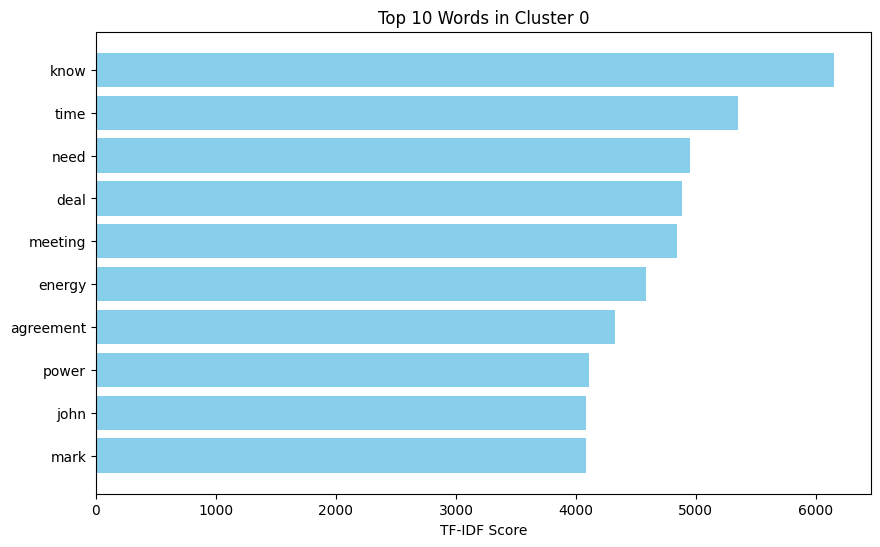

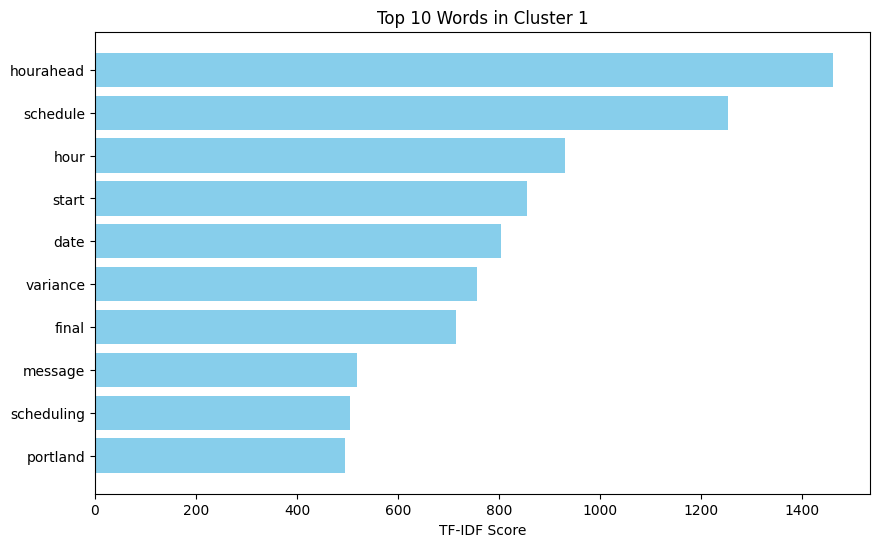

In [ ]:

# Get the feature names (words)
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

n_top_words = 10


for cluster_id in cluster_ids:
  cluster_indices = np.where(kmeans_nmf_labels == cluster_id)[0]

  # Get the TF-IDF matrix for the current cluster's documents
  cluster_tfidf = tfidf[cluster_indices]

  # Sum the TF-IDF scores for each word across the cluster's documents
  word_scores = np.asarray(cluster_tfidf.sum(axis=0)).flatten()

  # Get the top n words with the highest TF-IDF scores
  top_indices = word_scores.argsort()[-n_top_words:][::-1]  # Get indices of top words in descending order
  top_words = feature_names[top_indices]
  top_scores = word_scores[top_indices]

  # Plot the top 10 words in a bar chart
  plt.figure(figsize=(10, 6))
  plt.barh(top_words, top_scores, color='skyblue')
  plt.xlabel('TF-IDF Score')
  plt.title(f'Top {n_top_words} Words in Cluster {cluster_id}')
  plt.gca().invert_yaxis()  # Invert y-axis to have the top word on top
  plt.show()


